# Introduction to Pandas

## Basic Imports

In [1]:
import numpy as np
import pandas as pd
import math

# Stop pandas from abbreviating tables to fit in the notebook
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# Display graphs in the notebook
# %matplotlib inline

## Pandas DataFrames

### Creating a dataframe

Now, lets make a data frame with first making a list for each variable.

In [2]:
cities = ["Delhi","Mumbai","Kolkata","Chennai"]
code = [11,22,33,44]

mydata = list(zip(cities,code))

zip combines corresponding elements of an iterable into 
tuples

In [3]:
mydata

[('Delhi', 11), ('Mumbai', 22), ('Kolkata', 33), ('Chennai', 44)]

now lets convert this to a pandas data frame which comes with lot of useful and intuitive properties which makes our job easy when working with dataframes in general. If you have worked with R before, then you'd notice that pandas dataframes works very similar to R's data frames.

In [4]:
pd.DataFrame

pandas.core.frame.DataFrame

In [5]:
df = pd.DataFrame(data=mydata,columns=["cities","codes"])
df

,cities,codes
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,44


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df = pd.DataFrame({"cities":cities,"code":code})
df

,cities,code
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,44


to write a data frame to csv file , you can use function to_csv. In the function you need to set option index=False in order to avoid writing rownumbers to csv file and header=True , in order to write variables names in the first row of the csv file.

if you simply provide the file name, it will be written to where your .ipynb/.py file is. In case you want to write the file to a specific location then you'd need to mention the file name with complete path.

### Writing dataframe to file

- df.to_csv(filename, index=False, header=False)

In [8]:
df.to_csv("./data/mydata2.csv", index=False, header=False)
# df.to_csv("data/mydata.csv")

You can use function ExcelWriter to creater a writer object for an excel file. and then use function to_excel with data frame to write data to excel file. Here is an example

In [9]:
# !pip install openpyxl

In [10]:
# writer=pd.ExcelWriter("data/mydata.xlsx")

# df.to_excel(writer,"Sheet1",index=False)
# df.to_excel(writer,"Sheet2")

### Reading dataframe from file
- pd.read_csv

In [11]:
# !cat "./data/loans data.csv"

To read from a csv file, we'll be using function read_csv. we can create a separate string first with complete path name and then use it in the function or anywhere else.

In [12]:
file ='./data/loans data.csv'
ld = pd.read_csv(file)

In [13]:
type(ld)

pandas.core.frame.DataFrame

In [14]:
ld.shape

(2500, 15)

using function `head` you can lok at first few observations in the data which gives an idea about whether data was imported properly to python or not.

In [15]:
ld.sample(10) #ld.head(10) #ld.tail(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2030,96461.0,18825,18825,17.27%,60 months,credit_card,33.15%,MI,MORTGAGE,3583.33,690-694,12,13426,0.0,8 years
2455,98954.0,24000,24000,16.29%,36 months,debt_consolidation,29.05%,VT,MORTGAGE,5577.26,690-694,10,13393,1.0,2 years
641,46324.0,20000,19896.51,13.67%,36 months,debt_consolidation,15.34%,FL,RENT,5166.67,710-714,8,12394,1.0,6 years
1820,28315.0,2000,2000,16.89%,36 months,other,3.31%,NJ,RENT,2750.00,675-679,3,3247,2.0,2 years
1414,20690.0,4200,4200,7.29%,36 months,debt_consolidation,6.58%,IL,RENT,5133.33,765-769,4,5475,1.0,4 years
2440,11723.0,20000,20000,18.30%,60 months,debt_consolidation,15.91%,NY,MORTGAGE,5833.00,690-694,5,16140,1.0,10+ years
645,694.0,10000,8175.26,8.63%,36 months,debt_consolidation,5.91%,GA,MORTGAGE,7500.00,730-734,16,18343,0.0,7 years
171,96988.0,10000,10000,13.11%,36 months,credit_card,7.56%,PA,RENT,2500.00,685-689,8,10906,0.0,7 years
21,99483.0,30000,30000,19.05%,60 months,credit_card,21.25%,FL,MORTGAGE,6250.00,695-699,12,34927,0.0,6 years
312,25674.0,15000,15000,12.99%,60 months,debt_consolidation,17.45%,NY,RENT,5666.67,715-719,13,10855,0.0,3 years


### Dataframe attributes

- df.columns
- df.shape
- df.dtypes
- df.describe()
- df.info()

to get column names we can look attribute column of the data

In [ ]:
ld.columns

In [ ]:
len(ld.columns)

to see type of these columns we can use attribute dtypes

In [ ]:
ld.dtypes

flost64 here correponds to numeric values and object corresponds to categorical columns

to know how many rows and columns are their in the data we can use attribute shape

In [ ]:
ld.shape

this tells us that the data has 2500 rows/observations and 15 columns in it

In [ ]:
ld.describe()

### Indexing/ Subsetting

 - iloc `df.iloc[start_row:end_row,start_col:end_col]`
 - loc `df.loc[conditions,desired_cols]`
 
 <br>
 
`loc` gets rows (or columns) with particular labels from the index. <br>
`iloc` gets rows (or columns) at particular positions in the index (so it only takes integers).

now lets subset this data on the basis of row and column numbers , keep in mind that count start with 0 for both 

In [ ]:
ld.shape

In [ ]:
ld1=ld.iloc[3:7,1:5]
ld1

iloc here correponds to subsetting by position , to understand this better lets try to further subset this data

In [ ]:
ld1.iloc[2:4,1:3]

as you can see here the position is relative to current data , not the original one

All rows and the following ordered columns as a list

In [ ]:
ld.loc[:,["Home.Ownership"]]

Generally however we do not subset data by positions , we subset by either conditions or column names , if we are subsetting just on the basis of conditions or just column names we can directly pass those in square brackets

In [ ]:
ld.head(2)

In [ ]:
ld["Home.Ownership"]

In [ ]:
ld["Home.Ownership"].unique()

In [ ]:
conditions = ((ld['Home.Ownership']=='MORTGAGE') | (ld['Home.Ownership']=='RENT')) & (ld['Monthly.Income']>5000)

In [ ]:
ld[conditions].shape

In [ ]:
ld[conditions].sample(3)

In [ ]:
desired_cols = ['Home.Ownership','Monthly.Income']

In [ ]:
result = ld.loc[conditions,desired_cols]
result.shape

In [ ]:
result.sample(5)

in order to negate a condition or drop rows on the basis of a conditon , we just need to add a ~ symbol in front of the condition 

In [ ]:
ld[~(conditions)].shape

In [ ]:
1108+1392

in order to drop columns on the basis of names we can make use of the inbuilt drop function

In [ ]:
len(ld.columns)

In [ ]:
ld.drop(['Home.Ownership','Monthly.Income'], axis=1, inplace=True)

In [ ]:
ld.shape

if you scroll through the output you will find that those columns are no more in the data, this however doesnt modify the original data , these columns are still present in the data

In [ ]:
len(ld.columns)

In [ ]:
#ld=ld.drop(['Home.Ownership','Monthly.Income'],axis=1)

In [ ]:
ld.drop(['Debt.To.Income.Ratio', 'State'],axis=1,inplace=True)

In [ ]:
len(ld.columns)

this changes the data inplace 

In [ ]:
del ld['Employment.Length']

In [ ]:
ld.shape

## Numerical Analysis

- df.describe()
- df.nunique()
- df[category_name].describe()
- df.mean()

In [11]:
myfile='./data/bank-full.csv'
#bd=pd.read_csv(myfile) #try this first. Should give non-desired output.
bd = pd.read_csv(myfile,sep=";")

In [ ]:
bd.sample(10)

In [ ]:
bd.shape

In [ ]:
bd.columns

attribute dtype contains information regarding data type for all the columns

In [ ]:
bd.dtypes

dtype object refers to categorical variables for columns. You can check dtype for individual columns as follows :

In [ ]:
bd["month"].dtype

Function describe quickly prepares summary for numeric columns in the data.

In [ ]:
bd.describe()

In [ ]:
bd.nunique()

In [ ]:
bd["marital"].unique()

you can access specific summary statstic as well using respective functions. For example to find median of all numeric columns you do this :

In [ ]:
bd.median()

these describe and individual summary functions can be used with individual columns or subset of data too.

In [ ]:
bd["age"].describe()

In [ ]:
bd[["age","previous"]].describe()

The need for custom functions is minimal unless you have very specific requirements. The full range of basic statistics that are quickly calculable and built into the base Pandas package are:

|Function	|Description|
|-----------|-----------|
|count	|Number of non-null observations|
|sum	|Sum of values|
|mean	|Mean of values|
|mad	|Mean absolute deviation|
|median	|Arithmetic median of values|
|min	|Minimum|
|max	|Maximum|
|mode	|Mode|
|abs	|Absolute Value|
|prod	|Product of values|
|std	|Unbiased standard deviation|
|var	|Unbiased variance|
|sem	|Unbiased standard error of the mean|
|skew	|Unbiased skewness (3rd moment)|
|kurt	|Unbiased kurtosis (4th moment)|
|quantile	|Sample quantile (value at %)|
|cumsum	|Cumulative sum|
|cumprod	|Cumulative product|
|cummax	|Cumulative maximum|
|cummin	|Cumulative minimum|

For categorical variables, these kind of numeric summaries can not be calculated. As a summary we need to look at frequency of levels/categories of categorical variable. Which can be achieved through function value_counts(). This function doesn't work with a data frame.

## Analysing Categorical Variables

- df.select_dtypes()
- Series.nunique()
- Series.unique()
- Series.value_counts()

In [15]:
bd["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [16]:
bd["job"].nunique()

12

In [ ]:
bd["job"].value_counts()
## value_counts : does it count missing values 

In [ ]:
k = bd["job"].value_counts()
k

In [ ]:
type(k)

In [ ]:
k.values

In [ ]:
k.iloc[2:5]

In [ ]:
k.loc["services"]

In [ ]:
k.iloc[4]

You can use function select_dtypes for extracting a specific type of data columns from a dataframe as subset

In [ ]:
len(bd.columns)

In [ ]:
bd_cat_data = bd.select_dtypes(['object'])

In [ ]:
bd_cat_data.shape

In [ ]:
bd_cat_data.sample(5)

In [ ]:
len(bd_cat_data.columns)

attribute columns contains all column names of a data.frame

In [ ]:
bd_cat_data.dtypes

In [ ]:
for c in bd_cat_data.columns:
    print(c)
    print(15*"***")
    print(bd[c].value_counts())
    print(15*"---")

In [ ]:
for c in bd_cat_data.columns:
    print(c,":",bd[c].nunique())

For cross frequency tables between two variables we can use function cross tab as follows

## Combined Analysis

- pd.crosstab
- df.groupby

### Analysing Categorical Variable in Groups using Crosstab

In [ ]:
pd.crosstab(bd["job"],bd["default"]).sort_values(by=['no'])

In [ ]:
pd.crosstab(bd["default"], bd["job"])

In [ ]:
pd.crosstab(bd["y"], bd["job"], margins=True)

you can make higher dimension crosstab as well with the same function. To look at summary of a numerical variable across category of some categorical variable . we can use groupby functionality for the same lets look at examples to understand this:

### Analysis with Groupby

In [13]:
bd.shape

(45211, 17)

In [12]:
bd.sample(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8453,37,management,married,tertiary,no,0,yes,no,unknown,3,jun,247,13,-1,0,unknown,no
4728,34,admin.,married,secondary,no,50,yes,no,unknown,20,may,89,2,-1,0,unknown,no


In [14]:
bd.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [20]:
# visualising the groups
grouped = bd.groupby('job')

for nam,grou in grouped:
    print(nam)
    print(grou.head(5))

admin.
    age     job   marital  education default  balance housing loan  contact  \
10   41  admin.  divorced  secondary      no      270     yes   no  unknown   
11   29  admin.    single  secondary      no      390     yes   no  unknown   
16   45  admin.    single    unknown      no       13     yes   no  unknown   
25   44  admin.   married  secondary      no     -372     yes   no  unknown   
32   60  admin.   married  secondary      no       39     yes  yes  unknown   

    day month  duration  campaign  pdays  previous poutcome   y  
10    5   may       222         1     -1         0  unknown  no  
11    5   may       137         1     -1         0  unknown  no  
16    5   may        98         1     -1         0  unknown  no  
25    5   may       172         1     -1         0  unknown  no  
32    5   may       208         1     -1         0  unknown  no  
blue-collar
    age          job  marital  education default  balance housing loan  \
3    47  blue-collar  married    unk

In [21]:
# searching among specific groups
grouped.get_group('student')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
151,26,student,single,secondary,no,0,yes,no,unknown,5,may,610,2,-1,0,unknown,no
203,35,student,single,unknown,no,298,yes,no,unknown,5,may,611,2,-1,0,unknown,no
265,30,student,single,tertiary,no,25,yes,no,unknown,5,may,89,2,-1,0,unknown,no
292,24,student,single,secondary,no,423,yes,no,unknown,5,may,226,3,-1,0,unknown,no
297,24,student,single,secondary,no,82,yes,no,unknown,5,may,204,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,22,student,single,secondary,no,2488,no,no,cellular,8,nov,449,2,38,10,other,yes
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45170,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,-1,0,unknown,yes


In [22]:
grouped["age"].mean()

job
admin.           39.289886
blue-collar      40.044081
entrepreneur     42.190989
housemaid        46.415323
management       40.449567
retired          61.626767
self-employed    40.484484
services         38.740250
student          26.542644
technician       39.314598
unemployed       40.961627
unknown          47.593750
Name: age, dtype: float64

An aggregated function returns a single aggregated value for each group. Once the group by object is created, several aggregation operations can be performed on the grouped data.

In [23]:
grouped["age"].agg(np.mean)

job
admin.           39.289886
blue-collar      40.044081
entrepreneur     42.190989
housemaid        46.415323
management       40.449567
retired          61.626767
self-employed    40.484484
services         38.740250
student          26.542644
technician       39.314598
unemployed       40.961627
unknown          47.593750
Name: age, dtype: float64

In [24]:
grouped["age"].agg(np.size)
# grouped["age"].size()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: age, dtype: int64

In [25]:
grouped["age"].agg([np.sum, np.mean, np.std])

,sum,mean,std
job,,,
admin.,203168,39.289886,9.365483
blue-collar,389709,40.044081,9.025888
entrepreneur,62738,42.190989,9.114486
housemaid,57555,46.415323,10.477275
management,382572,40.449567,9.383415
retired,139523,61.626767,9.535329
self-employed,63925,40.484484,9.656075
services,160927,38.740250,9.041371
student,24897,26.542644,4.842536


this gives us average age across different job categories . You can use any other statistical summary function given in the table discussed previously in this module

you can calculate multiple groupwise summary stats for different columns also. Lets look at example below:

In [26]:
bd.groupby(['housing','loan'])["age","balance"].mean()

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


age      balance
housing loan                        
no      no    43.260695  1737.606719
        yes   42.417449   752.713243
yes     no    39.142947  1256.407793
        yes   39.329059   788.537898

you can use function agg with grouped data to calculate different summary stats for different columns. Here is an example

In [27]:
bd.groupby(['housing','loan']).agg({'age':'mean','duration':'max','balance':'sum'})

age  duration   balance
housing loan                               
no      no    43.260695      3881  29893786
        yes   42.417449      3422   2165556
yes     no    39.142947      4918  26086795
        yes   39.329059      3253   3443545

## Modifying Data
- changing column type (astype, to_numeric)
- modifying existing columns
- adding new columns
- removing existing columns
- conditional variables

In [28]:
cities=["Delhi","Mumbai","Kolkata","Chennai"]
code = ["11","22","33","4a"]

df = pd.DataFrame({"cities":cities,
                   "codes":code})
df

,cities,codes
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,4a


In [29]:
df.dtypes

cities    object
codes     object
dtype: object

you can see here that variable code is of type categorical, because we supplied the numbers in quotes. All the values in that column are essentially numbers except "4a". We can force numeric type on that column and values which can be converted to numbers will be converted. and values like "4a" which can not be converted to numbers will be converted NaN instead.

<center><img src="images/pd.df.astype.png" width="80%"/></center>

In [30]:
df["codes"]= df["codes"].astype("float", errors= "ignore")

In [32]:
df.dtypes

cities    object
codes     object
dtype: object

In [33]:
df

,cities,codes
0,Delhi,11
1,Mumbai,22
2,Kolkata,33
3,Chennai,4a


#### pandas.to_numeric(arg, errors='raise', downcast=None)

Convert argument to a numeric type.

Parameters:	
`arg :` list, tuple, 1-d array, or Series

`errors : {‘ignore’, ‘raise’, ‘coerce’}`, default ‘raise’
 - If ‘raise’, then invalid parsing will raise an exception
 - If ‘coerce’, then invalid parsing will be set as NaN
 - If ‘ignore’, then invalid parsing will return the input
 
`downcast : {‘integer’, ‘signed’, ‘unsigned’, ‘float’}` , default None

If not None, and if the data has been successfully cast to a numerical dtype (or if the data was numeric to begin with), downcast that resulting data to the smallest numerical dtype possible according to the following rules:

‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8) <br>
‘unsigned’: smallest unsigned int dtype (min.: np.uint8) <br>
‘float’: smallest float dtype (min.: np.float32) <br>

As this behaviour is separate from the core conversion to numeric values, any errors raised during the downcasting will be surfaced regardless of the value of the ‘errors’ input.

In addition, downcasting will only occur if the size of the resulting data’s dtype is strictly larger than the dtype it is to be cast to, so if none of the dtypes checked satisfy that specification, no downcasting will be performed on the data.

In [34]:
# errors : {‘ignore’, ‘raise’, ‘coerce’},
df["codes2"]=pd.to_numeric(df["codes"], errors="coerce")
df.dtypes

cities     object
codes      object
codes2    float64
dtype: object

In [35]:
df

,cities,codes,codes2
0,Delhi,11,11.0
1,Mumbai,22,22.0
2,Kolkata,33,33.0
3,Chennai,4a,NaN


For creating a new column in the data , you can always create a list which can be attached to the data as couple of examples given below:

In [36]:
# modifying an existing column
df["codes3"]=[x.replace("a","6") for x in df["codes"]]
df

,cities,codes,codes2,codes3
0,Delhi,11,11.0,11
1,Mumbai,22,22.0,22
2,Kolkata,33,33.0,33
3,Chennai,4a,NaN,46


In [37]:
df.dtypes

cities     object
codes      object
codes2    float64
codes3     object
dtype: object

In [38]:
df["codes3"]= df["codes3"].astype("float", errors= "ignore")

In [39]:
df.dtypes

cities     object
codes      object
codes2    float64
codes3    float64
dtype: object

In [40]:
# adding a new column using existing ones
df["code_log"]=[math.log(x) for x in df["codes2"]]
df

,cities,codes,codes2,codes3,code_log
0,Delhi,11,11.0,11.0,2.397895
1,Mumbai,22,22.0,22.0,3.091042
2,Kolkata,33,33.0,33.0,3.496508
3,Chennai,4a,NaN,46.0,NaN


In [41]:
# you can use multiple columns too
df["new"]=df.codes2+df.code_log
df["new2"]=df.new+2
df

,cities,codes,codes2,codes3,code_log,new,new2
0,Delhi,11,11.0,11.0,2.397895,13.397895,15.397895
1,Mumbai,22,22.0,22.0,3.091042,25.091042,27.091042
2,Kolkata,33,33.0,33.0,3.496508,36.496508,38.496508
3,Chennai,4a,NaN,46.0,NaN,NaN,NaN


### conditional variables

In [42]:
df = pd.DataFrame({'Type': list('ABBC'), 
                   'Set' : list('ZZXY')})
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [ ]:
#np.where(condition, value_if_True, value_if_False)

In [43]:
arr = np.where(df['Set']=='Z', 'green', df['Set'])
arr

array(['green', 'green', 'X', 'Y'], dtype=object)

In [44]:
#df['color'] = np.where(df['Set']=='Z', 'green', df['Set'])
df['color'] = arr
df

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,X
3,C,Y,Y


in function np.where, first argument is the condition which may or may not involve existing columns of the data, second arugument is the value which the new column will take when the condition in first argument is true . If the condition is not true , new column will take value from the third argument. 

In [45]:
df['abc'] = np.where(df['Set']=='Z', df['Type'], df['Set'])
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,X,X
3,C,Y,Y,Y


As you can see , second and third arguments of the function np.where dont need to be constant values. They can be similar length lists as well coming from a dataframe or otherwise.

To drop columns you can either use their name or positions . Here are few examples:

In [49]:
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,X,X
3,C,Y,Y,Y


In [50]:
df.drop("abc",axis=1, inplace=False) 
# to drop inplace , you can use option inplace as we see in the next exmaple

,Type,Set,color
0,A,Z,green
1,B,Z,green
2,B,X,X
3,C,Y,Y


In [51]:
df

,Type,Set,color,abc
0,A,Z,green,A
1,B,Z,green,B
2,B,X,X,X
3,C,Y,Y,Y


In [52]:
df.drop("color",axis=1,inplace=True)
df

,Type,Set,abc
0,A,Z,A
1,B,Z,B
2,B,X,X
3,C,Y,Y


In [53]:
df.columns[0]

'Type'

In [54]:
df=df.drop(df.columns[0],axis=1)
df

,Set,abc
0,Z,A
1,Z,B
2,X,X
3,Y,Y


Notice that while using column positions , counting starts from 0.

Next we see how to drop observations from a data using both , row positions and conditions

In [55]:
df

,Set,abc
0,Z,A
1,Z,B
2,X,X
3,Y,Y


In [56]:
df=df.drop([2],axis=0)
df

,Set,abc
0,Z,A
1,Z,B
3,Y,Y


You can see that 4th row from the data has been deleted. Remebered that here also counting start at 0.Next we see subsetting data based a condition.

In [57]:
df = pd.DataFrame({'Type':list('ABBC'), 
                   'Set': list('ZZXY')})
df

,Type,Set
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [58]:
df=df[df["Type"]=="B"]
df

,Type,Set
1,B,Z
2,B,X


So for we have seen, how to select entire columns and process them. Many at times you might need to select entire rows or specific values in the columns. Here is how you do it. 

In [62]:
df.index

Int64Index([1, 2], dtype='int64')

Notice that the index is still from the original data, you can either update that or use the existing values.We'll update the index here.

In [63]:
df['col2']=[1,2]
df

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Type,Set,col2
1,B,Z,3
2,B,X,4


In [64]:
df = df.reset_index(drop=True)
df

,Type,Set,col2
0,B,Z,3
1,B,X,4


In [65]:
# selecting a row
df.loc[1]

Type    B
Set     X
col2    4
Name: 1, dtype: object

In [66]:
# selecting a column
df.iloc[:,1]

0    Z
1    X
Name: Set, dtype: object

In [67]:
# selecting a sprecific value with row,column names/indices
print(df.iloc[0,1])
print(df.iloc[0]['Type'])

Z
B


### Intricate data cleaning

In [68]:
file='data/loans data.csv'
ld=pd.read_csv(file)

In [69]:
ld.shape

(2500, 15)

In [70]:
ld.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [71]:
ld['Interest.Rate'].sample(5)

467     13.11%
542     13.99%
2403    14.09%
397      8.90%
1919    15.31%
Name: Interest.Rate, dtype: object

In [72]:
ld['FICO.Range'].sample(5)

293     745-749
291     670-674
2465    755-759
384     725-729
1176    715-719
Name: FICO.Range, dtype: object

In [73]:
ld['Amount.Requested'].sample(5)

1853     5000
1849     5000
2238     4800
2399    20000
2160     9800
Name: Amount.Requested, dtype: object

 - The rstrip() method returns a copy of the string with trailing characters removed (based on the string argument passed)

In [74]:
new_rate = ld['Interest.Rate'].map(lambda x: float(x.rstrip('%')))
new_rate.head(5)

0     8.90
1    12.12
2    21.98
3     9.99
4    11.71
Name: Interest.Rate, dtype: float64

In [75]:
fico_lr = ld['FICO.Range'].map(lambda x: float(str(x[0:3])))
fico_lr.head(5)

0    735.0
1    715.0
2    690.0
3    695.0
4    695.0
Name: FICO.Range, dtype: float64

In [76]:
fico_ur = ld['FICO.Range'].map(lambda x: float(str(x[4:])))
fico_ur.head(5)

0    739.0
1    719.0
2    694.0
3    699.0
4    699.0
Name: FICO.Range, dtype: float64

In [77]:
loanamt_clean = pd.to_numeric(ld['Amount.Requested'], errors="coerce")
loanamt_clean.head(5)

0    20000.0
1    19200.0
2    35000.0
3    10000.0
4    12000.0
Name: Amount.Requested, dtype: float64

In [78]:
#swap the columns with column with clean data
#Note the column head doesn't change but only the data is replace
ld['Interest.Rate']=new_rate
ld['FICO.Range.LR']=fico_lr
ld['FICO.Range.UR']=fico_ur
ld['Amount.Requested'] = loanamt_clean

In [79]:
del ld['FICO.Range']

In [80]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors         object
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
FICO.Range.LR                     float64
FICO.Range.UR                     float64
dtype: object

In [81]:
ld["Home.Ownership"].nunique()

5

In [82]:
ld["Home.Ownership"].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [89]:
ld.head(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Range.LR,FICO.Range.UR
0,81174.0,20000.0,20000,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,14,14272,2.0,< 1 year,735.0,739.0
1,99592.0,19200.0,19200,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,12,11140,1.0,2 years,715.0,719.0
2,80059.0,35000.0,35000,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,14,21977,1.0,2 years,690.0,694.0
3,15825.0,10000.0,9975,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,10,9346,0.0,5 years,695.0,699.0
4,33182.0,12000.0,12000,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,11,14469,0.0,9 years,695.0,699.0
5,62403.0,6000.0,6000,15.31,36 months,other,20.05%,CT,OWN,4891.67,17,10391,2.0,3 years,670.0,674.0
6,48808.0,10000.0,10000,7.90,36 months,debt_consolidation,26.09%,MA,RENT,2916.67,10,15957,0.0,10+ years,720.0,724.0
7,22090.0,33500.0,33450,17.14,60 months,credit_card,14.70%,LA,MORTGAGE,13863.42,12,27874,0.0,10+ years,705.0,709.0
8,76404.0,14675.0,14675,14.33,36 months,credit_card,26.92%,CA,RENT,3150.00,9,7246,1.0,8 years,685.0,689.0
9,15867.0,NaN,7000,6.91,36 months,credit_card,7.10%,CA,RENT,5000.00,8,7612,0.0,3 years,715.0,719.0


In [88]:
pd.get_dummies(ld["Home.Ownership"]).head(10)

,MORTGAGE,NONE,OTHER,OWN,RENT
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,1,0,0,0,0
8,0,0,0,0,1
9,0,0,0,0,1


## Merge & Concatenate dataframes
In this section we see how to combine two or more dataframes in various ways. Starting with simple vertical stacking:

In [90]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']}
                    )

In [91]:
df2 = pd.DataFrame({'A': ['A4', 'A1', 'A2', 'A3'],
                       'B': ['B4', 'B1', 'B2', 'B3'],
                        'C': ['C4', 'C1', 'C2', 'C3'],
                        'D': ['D4', 'D1', 'D2', 'D3']}
                        )


In [92]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [93]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


For simple stacking [vertical or horizontal], we'll be using function concat. By using axis option, you can either horizontally or vertically stack the data. Keep in mind that pandas data.frames can have duplicate column names, which can a be huge hassle later on. So when you are horizontally stacking two datasets, do check for that possibility.

In [94]:
#vertical stacking
newdata_long = pd.concat([df1,df2], axis=0)
newdata_long

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [95]:
#reset index
newdata_long = newdata_long.reset_index(drop=True)
newdata_long

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A1,B1,C1,D1
6,A2,B2,C2,D2
7,A3,B3,C3,D3


In [96]:
df3 = pd.DataFrame({'E': ['A4', 'A1', 'A2', 'A3',"ab"],
                       'F': ['B4', 'B1', 'B2', 'B3',"ab"],
                        'G': ['C4', 'C1', 'C2', 'C3',"ab"],
                        'H': ['D4', 'D1', 'D2', 'D3',"ab"]}
                        )
df3

,E,F,G,H
0,A4,B4,C4,D4
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,ab,ab,ab,ab


In [97]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [98]:
newdata_wide = pd.concat([df1,df3],axis=1)
newdata_wide

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A1,B1,C1,D1
2,A2,B2,C2,D2,A2,B2,C2,D2
3,A3,B3,C3,D3,A3,B3,C3,D3
4,NaN,NaN,NaN,NaN,ab,ab,ab,ab


Simple vertical and horizontal stacking at times doesnt work. You need to merge data by some keys . lets look how to do inner,outer,left,right joins using the function merge.

There are four options for "how", the other important argument in merge:
- "inner": intersection of keys
- "outer": union of keys
- "left": use keys from left only
- "right": use keys from right only

In [99]:
df1=pd.DataFrame({"custid":[1,2,3,4,5],
                 "product":["Radio","Radio","Fridge","Fridge","Phone"]})

df2=pd.DataFrame({"custid":[3,4,5,6,7],
                 "state":["UP","UP","UP","MH","MH"]})

In [100]:
df1

,custid,product
0,1,Radio
1,2,Radio
2,3,Fridge
3,4,Fridge
4,5,Phone


In [101]:
df2

,custid,state
0,3,UP
1,4,UP
2,5,UP
3,6,MH
4,7,MH


In [102]:
# inner join
inner=pd.merge(df1,df2,on=["custid"], how='inner')
inner

,custid,product,state
0,3,Fridge,UP
1,4,Fridge,UP
2,5,Phone,UP


In [103]:
#outer join
outer=pd.merge(df1,df2,on=["custid"],how='outer')
outer

,custid,product,state
0,1,Radio,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP
5,6,NaN,MH
6,7,NaN,MH


In [104]:
df1

,custid,product
0,1,Radio
1,2,Radio
2,3,Fridge
3,4,Fridge
4,5,Phone


In [105]:
#left join
left=pd.merge(df1,df2,on=["custid"],how='left')
left

,custid,product,state
0,1,Radio,NaN
1,2,Radio,NaN
2,3,Fridge,UP
3,4,Fridge,UP
4,5,Phone,UP


In [ ]:
#right join
right=pd.merge(df1,df2,on=["custid"],how='right')
right

### df.join()

The related DataFrame.join method, uses merge internally for the index-on-index and index-on-column(s) joins, **but joins on indexes by default** rather than trying to join on common columns (the default behavior for merge). If you are joining on index, you may wish to use DataFrame.join to save yourself some typing.

In [106]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [107]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [108]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [109]:
left.join(right, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [110]:
left.join(right, how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [111]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [112]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## Visual Data Analysis

Next we look at ways to visually summarise our data. Simple plot function for numeric columns, plots values along the observation numbers

In [115]:
myfile='data/bank-full.csv'
bd=pd.read_csv(myfile,sep=";")

In [116]:
bd.shape

(45211, 17)

In [117]:
bd["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:>

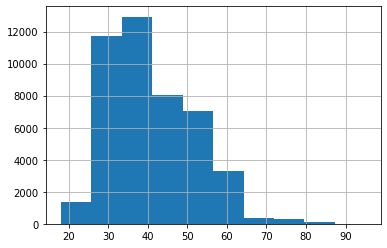

In [123]:
bd["age"].hist()

<AxesSubplot:>

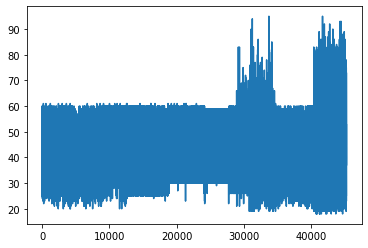

In [118]:
bd["age"].plot()

In [113]:
import seaborn as sns
import matplotlib

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

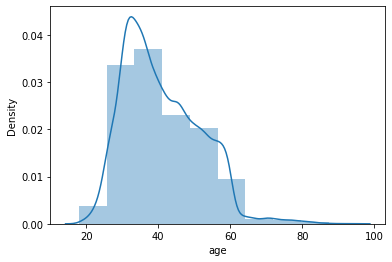

In [122]:
#density plot
sns.distplot(bd['age'], bins=10, kde=True) #histogram and density curve
# see what various values to these options do

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

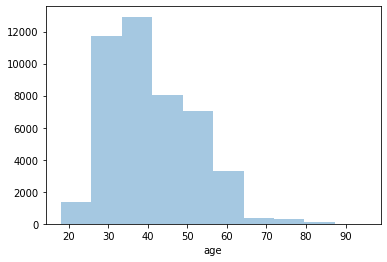

In [120]:
sns.distplot(bd['age'], kde=False, bins=10, hist=True, norm_hist=False)

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


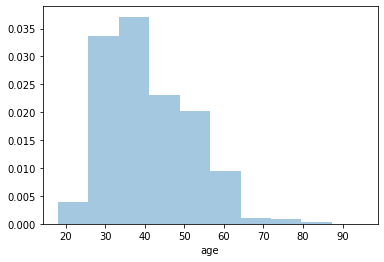

In [124]:
myplot = sns.distplot(bd['age'],kde=False,norm_hist=True,bins=10,hist=True)
myimg = myplot.get_figure()
myimg.savefig('./data/output.png')

<AxesSubplot:xlabel='age', ylabel='Density'>

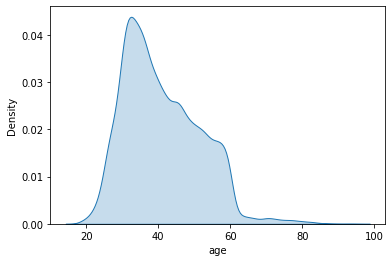

In [125]:
#sns.kdeplot(bd['pdays'],shade=True)
sns.kdeplot(bd['age'], shade=True)

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

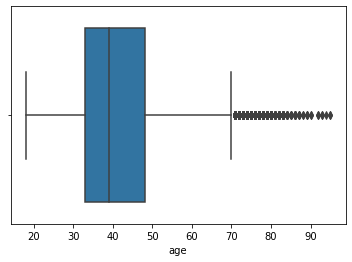

In [126]:
sns.boxplot(bd['age'])

### numeric-numeric

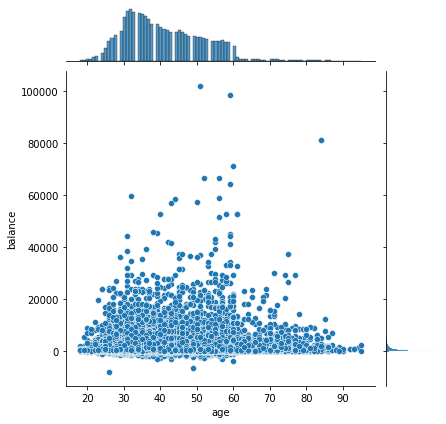

In [127]:
sns.jointplot(x="age", y="balance", data=bd)

C:\Users\Pradip.Gupta\.conda\envs\tutor\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


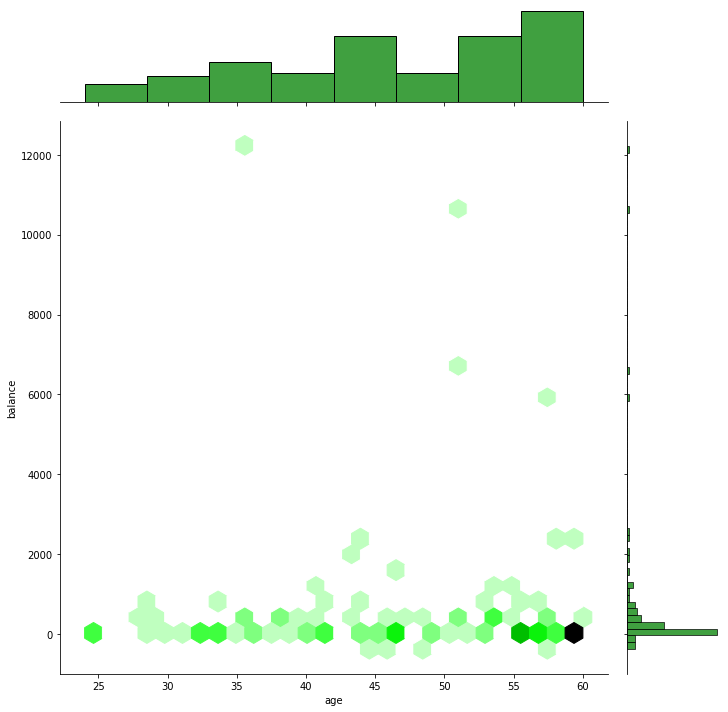

In [128]:
sns.jointplot(x="age", y="balance", 
              data=bd.iloc[:100,:],
              kind="hex",size=10,color="g")

In [136]:
bd.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [138]:
bd.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25724,53,management,married,tertiary,no,8093,no,no,cellular,19,nov,93,1,-1,0,unknown,no
9728,42,technician,married,secondary,no,6250,no,no,unknown,9,jun,107,3,-1,0,unknown,no
21332,49,blue-collar,married,primary,no,1798,yes,yes,telephone,18,aug,209,2,-1,0,unknown,no
24051,52,management,married,tertiary,no,6,no,no,telephone,19,oct,57,1,-1,0,unknown,no
3602,52,blue-collar,married,secondary,no,2206,yes,no,unknown,15,may,875,5,-1,0,unknown,no
41651,38,technician,single,secondary,no,1711,no,no,telephone,30,sep,234,1,-1,0,unknown,yes
18505,28,management,married,tertiary,no,22,yes,no,cellular,31,jul,59,3,-1,0,unknown,no
12743,27,management,single,secondary,no,1609,yes,no,cellular,7,jul,360,3,-1,0,unknown,no
28087,54,blue-collar,married,unknown,no,310,yes,no,telephone,28,jan,526,4,258,3,other,no
1386,37,admin.,married,primary,no,242,yes,no,unknown,8,may,161,8,-1,0,unknown,no


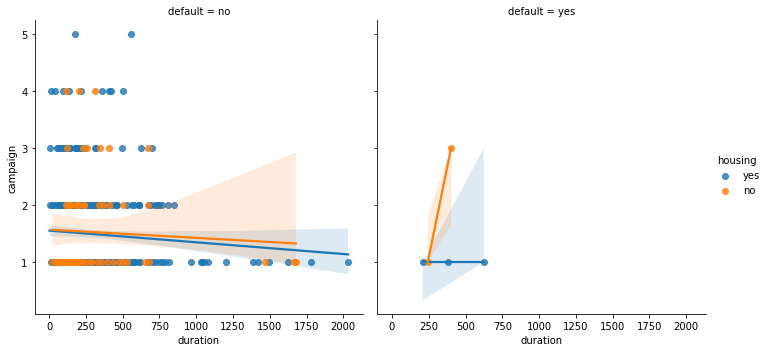

In [129]:
#linear model plot
sns.lmplot(x='duration', y='campaign', 
           data=bd.iloc[1:500,:],
            hue="housing",
            col="default")

### Categorical

<AxesSubplot:xlabel='education', ylabel='count'>

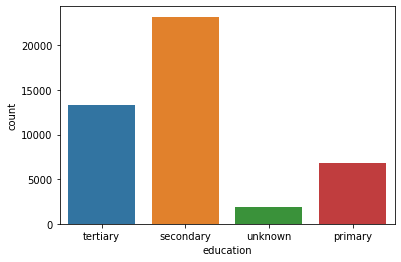

In [141]:
sns.countplot(x="education", data=bd)

### Heatmaps

<AxesSubplot:>

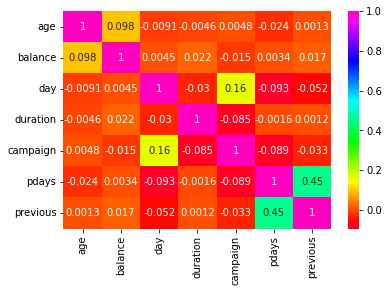

In [147]:
sns.heatmap(bd.corr(), annot=True, cmap="gist_rainbow")